In [1]:
candidate_number = 111111

# Loading Wyscout Data

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


### Tags

In [3]:
ws_tags = pd.read_csv('../Data/Wyscout/tags2name.csv')
ws_tags.sort_values('Tag')

,Tag,Label,Description
0,101,Goal,Goal
1,102,own_goal,Own goal
16,201,opportunity,Opportunity
2,301,assist,Assist
3,302,keyPass,Key pass
5,401,Left,Left foot
6,402,Right,Right foot
7,403,head/body,Head/body
19,501,free_space_r,Free space right
20,502,free_space_l,Free space left


## Shots

In [4]:
event_data = [
    'events_England.json',
    'events_France.json',
    'events_Germany.json',
    'events_Italy.json',
    'events_Spain.json'
]

event_list = []
for data in event_data:
    event_list.append(pd.read_json('../Data/Wyscout/events/' + data))

ws_event = pd.concat(event_list)
ws_event[["eventName","subEventName"]].sort_values(by=["eventName","subEventName"]).value_counts(sort=False)


eventName                subEventName           
Duel                     Air duel                    158186
                         Ground attacking duel       265456
                         Ground defending duel       264552
                         Ground loose ball duel      143861
Foul                     Foul                         44293
                         Hand foul                     1941
                         Late card foul                 300
                         Out of game foul               473
                         Protest                        561
                         Simulation                     108
                         Time lost foul                 205
                         Violent Foul                    74
Free Kick                Corner                       18181
                         Free Kick                    43544
                         Free kick cross               8134
                         Free kick shot            

In [5]:
ws_shot_data = ws_event[ws_event['subEventName'].isin(['Shot', 'Free kick shot', 'Penalty'])]
ws_shot_data.reset_index(drop=True, inplace=True)
ws_shot_data.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212
1,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247
2,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280
3,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100,177959289
4,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100,177959429


In [6]:
ws_shot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   eventId       43040 non-null  int64  
 1   subEventName  43040 non-null  object 
 2   tags          43040 non-null  object 
 3   playerId      43040 non-null  int64  
 4   positions     43040 non-null  object 
 5   matchId       43040 non-null  int64  
 6   eventName     43040 non-null  object 
 7   teamId        43040 non-null  int64  
 8   matchPeriod   43040 non-null  object 
 9   eventSec      43040 non-null  float64
 10  subEventId    43040 non-null  object 
 11  id            43040 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 3.9+ MB


## Player

In [7]:
player_data = pd.read_json('../Data/Wyscout/players.json')
player_data.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


In [8]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3603 entries, 0 to 3602
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   passportArea           3603 non-null   object
 1   weight                 3603 non-null   int64 
 2   firstName              3603 non-null   object
 3   middleName             3603 non-null   object
 4   lastName               3603 non-null   object
 5   currentTeamId          3512 non-null   object
 6   birthDate              3603 non-null   object
 7   height                 3603 non-null   int64 
 8   role                   3603 non-null   object
 9   birthArea              3603 non-null   object
 10  wyId                   3603 non-null   int64 
 11  foot                   3603 non-null   object
 12  shortName              3603 non-null   object
 13  currentNationalTeamId  3603 non-null   object
dtypes: int64(3), object(11)
memory usage: 394.2+ KB


## Match

In [9]:
match_data = [
    'matches_England.json',
    'matches_France.json',
    'matches_Germany.json',
    'matches_Italy.json',
    'matches_Spain.json'
]

match_list = []
for data in match_data:
    match_list.append(pd.read_json(f'../Data/Wyscout/matches/{data}'))

ws_match = pd.concat(match_list)
ws_match.reset_index(drop=True, inplace=True)
ws_match.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364


## Competition

In [10]:
competition_data = pd.read_json('../Data/Wyscout/competitions.json')
competition_data

,name,wyId,format,area,type
0,Italian first division,524,Domestic league,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
1,English first division,364,Domestic league,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
2,Spanish first division,795,Domestic league,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,French first division,412,Domestic league,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
4,German first division,426,Domestic league,"{'name': 'Germany', 'id': '276', 'alpha3code':...",club
5,European Championship,102,International cup,"{'name': '', 'id': 0, 'alpha3code': 'XEU', 'al...",international
6,World Cup,28,International cup,"{'name': '', 'id': 0, 'alpha3code': 'XWO', 'al...",international


# EDA

## Shots overview

## Shot's location & outcome

In [11]:
ws_shot = ws_shot_data[['positions', 'subEventName', 'tags', 'playerId', 'matchId', 'eventSec']]

ws_shot = ws_shot.merge(ws_match[['wyId', 'competitionId']], left_on='matchId', right_on='wyId')
ws_shot = ws_shot.merge(competition_data[['wyId', 'name']], left_on='competitionId', right_on='wyId').rename(columns={'name': 'competition'})

Extract and convert shot's lacation from Tag and convert to the standard UEFA pitch dimension

In [12]:
# %pip install mplsoccer

In [13]:
from mplsoccer.dimensions import create_pitch_dims

dim = create_pitch_dims(pitch_type='uefa')

In [14]:
ws_shot['x'] = ws_shot['positions'].apply(lambda x: x[0]['x'])*dim.pitch_length/100
ws_shot['y'] = ws_shot['positions'].apply(lambda x: x[0]['y'])*dim.pitch_width/100

Shots' outcomes

In [15]:
# convert tags to list of tag ids
ws_shot['tags'] = ws_shot['tags'].apply(lambda x: [tag['id'] for tag in x])

In [16]:
# extract outcome from tags
ws_shot['outcome'] = ws_shot['tags'].apply(lambda x: 1 if 101 in x else 0)


In [17]:
ws_shot.head()

,positions,subEventName,tags,playerId,matchId,eventSec,wyId_x,competitionId,wyId_y,competition,x,y,outcome
0,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",Shot,"[101, 402, 201, 1205, 1801]",25413,2499719,94.595788,2499719,364,364,English first division,92.40,27.88,1
1,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",Shot,"[401, 201, 1211, 1802]",26150,2499719,179.854785,2499719,364,364,English first division,89.25,35.36,0
2,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",Shot,"[101, 403, 201, 1207, 1801]",14763,2499719,254.745027,2499719,364,364,English first division,100.80,35.36,1
3,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",Shot,"[401, 201, 1215, 1802]",7868,2499719,425.824035,2499719,364,364,English first division,85.05,22.44,0
4,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",Shot,"[402, 201, 1205, 1801]",7868,2499719,815.462015,2499719,364,364,English first division,78.75,20.40,0


In [18]:
ws_shot.groupby('competition').size()

competition
English first division    8881
French first division     8977
German first division     7290
Italian first division    9347
Spanish first division    8545
dtype: int64

In [19]:
ws_shot[ws_shot['outcome']==1].groupby('competition').size()

competition
English first division    988
French first division     998
German first division     833
Italian first division    978
Spanish first division    993
dtype: int64

## Shots and Goals visualizations 

Heatmap of all shots and all goals

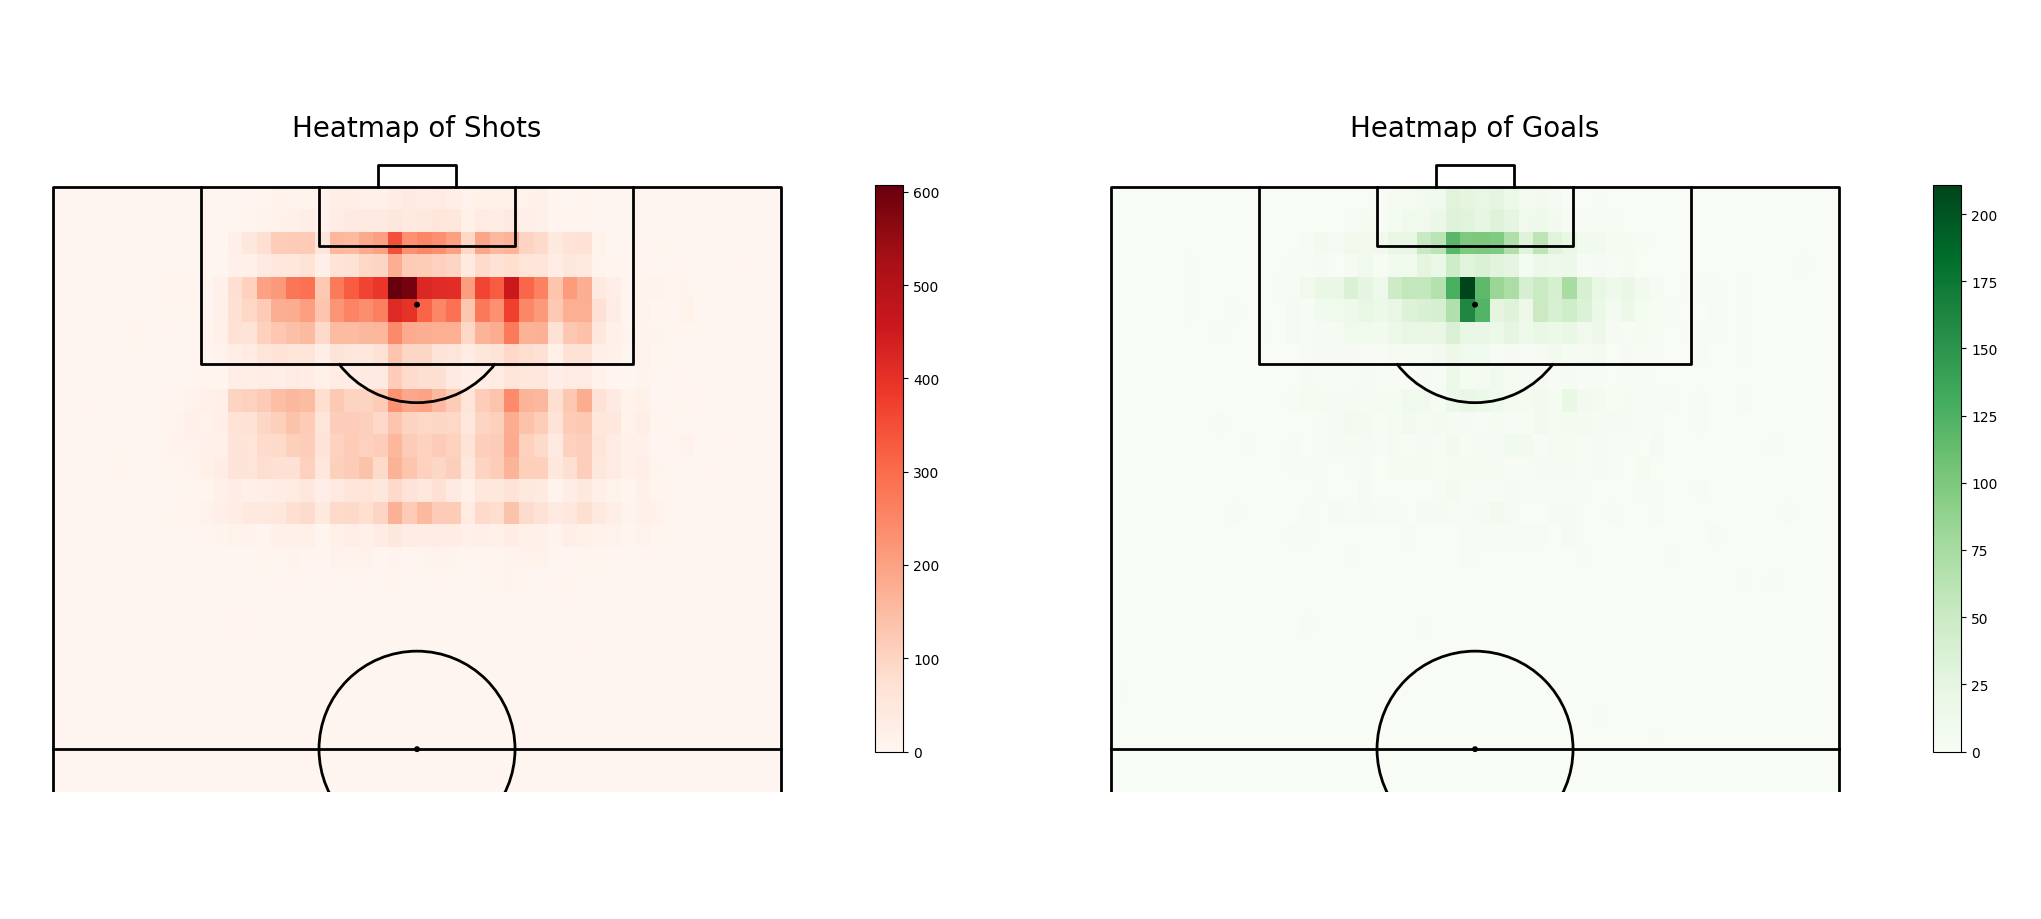

In [20]:
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch

#plot pitch
pitch = VerticalPitch(line_color='black', line_zorder=2, half = True, goal_type='box', pitch_type='uefa')
fig, ax = pitch.grid(nrows=1, ncols=2, grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0,)

bin_shots = pitch.bin_statistic(ws_shot['x'], ws_shot['y'], bins=50)
bin_goals = pitch.bin_statistic(ws_shot[ws_shot['outcome'] == 1]['x'], ws_shot[ws_shot['outcome'] == 1]['y'], bins=50)

pcm_shots = pitch.heatmap(bin_shots, ax=ax['pitch'][0], cmap='Reds', edgecolor=None)
ax['pitch'][0].set_title('Heatmap of Shots', fontsize=20, color='black')
cbar_shots = fig.colorbar(pcm_shots, ax=ax['pitch'][0], orientation='vertical', shrink=0.7, aspect=20)

pcm_goals = pitch.heatmap(bin_goals, ax=ax['pitch'][1], cmap='Greens', edgecolor=None)
ax['pitch'][1].set_title('Heatmap of Goals', fontsize=20, color='black')
cbar_goals = fig.colorbar(pcm_goals, ax=ax['pitch'][1], orientation='vertical', shrink=0.7, aspect=20)

# fig.suptitle('Heatmap Shots and Goals', x=0.5, y=0.98, fontsize=24, color='black')
plt.show()

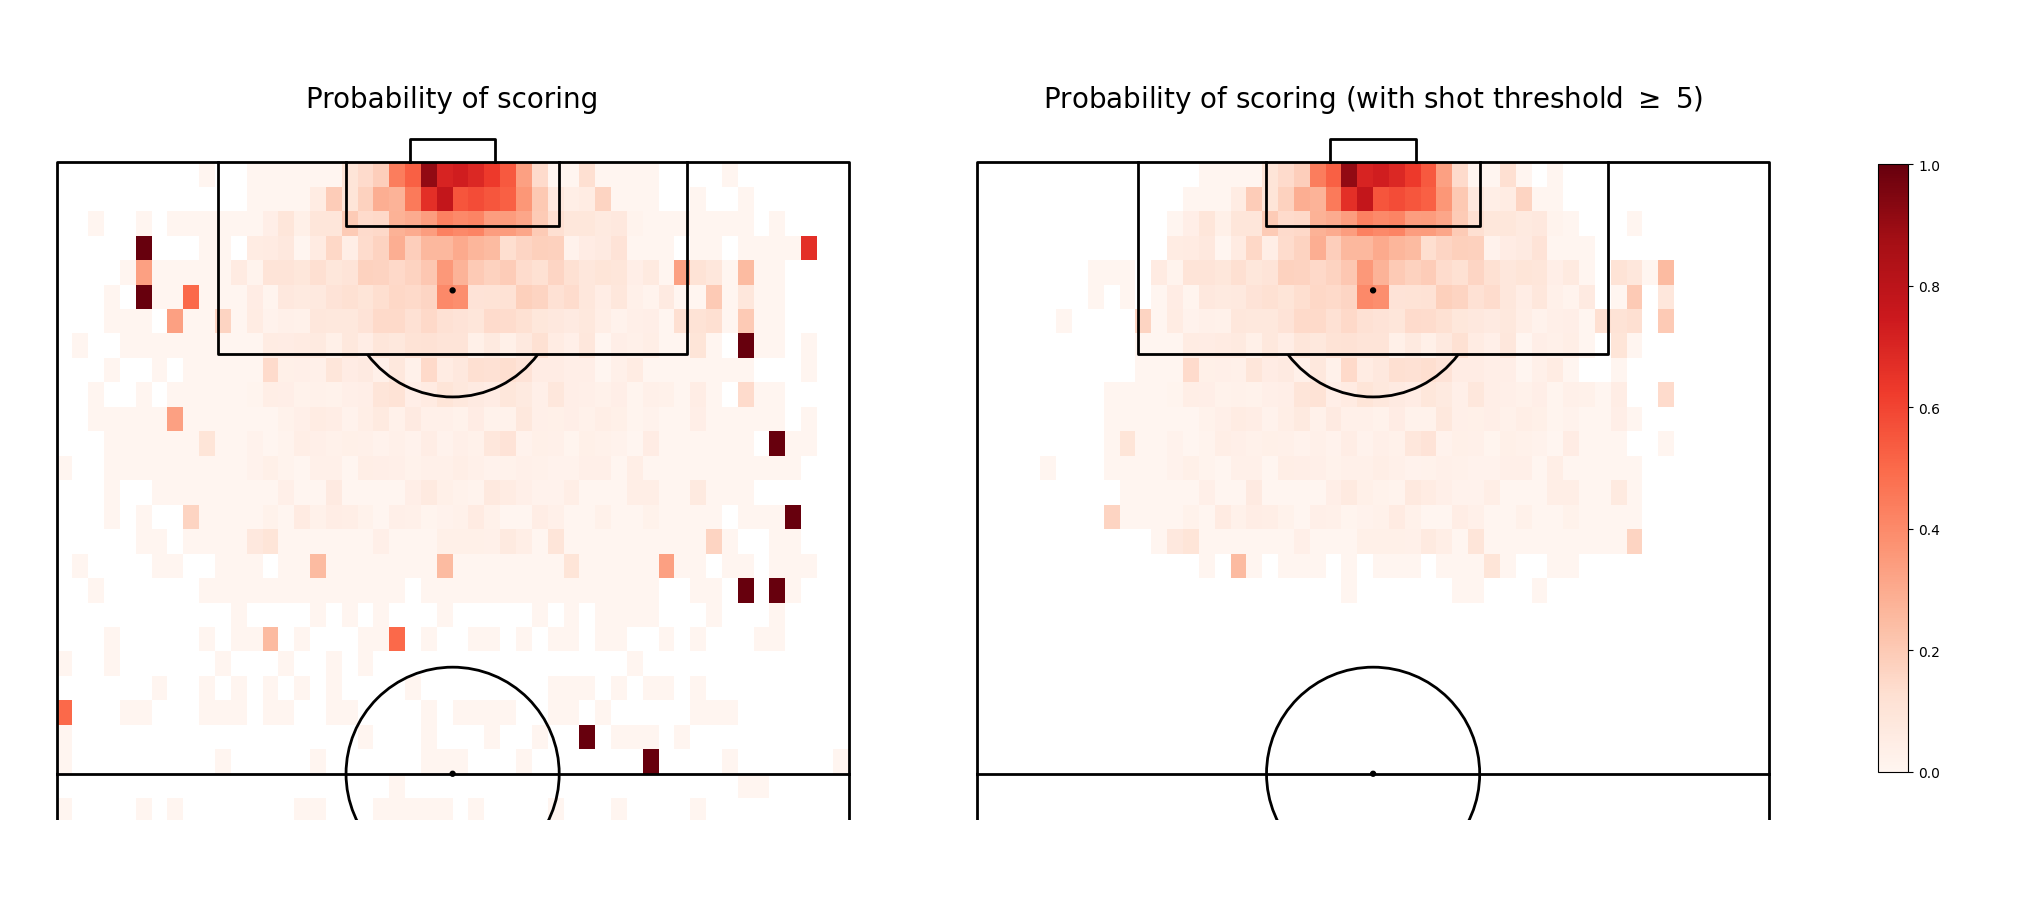

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch

#plot pitch
pitch = VerticalPitch(line_color='black', line_zorder=2, half = True, goal_type='box', pitch_type='uefa')
fig, ax = pitch.grid(nrows=1, ncols=2, grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0,)

shot_threshold = 5

bin_proba = bin_shots.copy()
bin_proba['statistic'] = bin_goals['statistic'] / bin_shots['statistic']

bin_proba_with_threshold = bin_shots.copy()
proba_with_threshold = np.where(bin_shots['statistic'] >= shot_threshold, bin_goals['statistic'] / bin_shots['statistic'], np.nan)
bin_proba_with_threshold['statistic'] = proba_with_threshold

pcm_proba = pitch.heatmap(bin_proba, ax=ax['pitch'][0], cmap='Reds', edgecolor=None, vmin=0, vmax=1)
ax['pitch'][0].set_title('Probability of scoring', fontsize=20, color='black')
pcm_proba_threshold = pitch.heatmap(bin_proba_with_threshold, ax=ax['pitch'][1], cmap='Reds', edgecolor=None, vmin=0, vmax=1)
ax['pitch'][1].set_title(rf"Probability of scoring (with shot threshold $\geq$ {shot_threshold})", fontsize=20, color='black')


cbar= fig.colorbar(pcm_proba_threshold, ax=ax['pitch'], orientation='vertical', shrink=0.75, aspect=20, fraction=0.1, pad=0.03)

# fig.suptitle('Heatmap of Probability of Scoring', x=0.5, y=0.98, fontsize=24, color='black')
plt.show()

## Extracting Features

### Shot type

In [22]:
def extract_shot_type(x):
    if x == 'Shot':
        return 'open_play'
    elif x == 'Free kick shot':
        return 'free_kick'
    elif x == 'Penalty':
        return 'penalty'

In [23]:
ws_shot['shot_type'] = ws_shot['subEventName'].apply(extract_shot_type)

### Body part

Extract the body parts from Tag and encode them

In [24]:
def extract_body_part(x):
    if 401 in x:
        return "Right Foot"
    elif 402 in x:
        return "Left Foot"
    elif 403 in x:
        return "Head/Other"

In [25]:
# extract body part from tags
ws_shot['body_part'] = ws_shot['tags'].apply(extract_body_part)

### Is strong foot

Extract players' strong foot

In [26]:
strong_foot = player_data[['wyId', 'foot']]
strong_foot['foot'].value_counts()

foot
right    2708
left      838
           48
both        5
null        4
Name: count, dtype: int64

Assuming that the majority of players are right-footed, we can fill the missing values with 'Right'.

In [27]:
def extract_foot(x):
    if x == 'right':
        return 'Right Foot'
    elif x == 'left':
        return 'Left Foot'
    elif x == 'both':
        return 'Both'
    else:
        return 'Right Foot'

In [28]:
strong_foot['foot'] = strong_foot['foot'].apply(extract_foot)

Merge shots with foot

In [29]:
ws_shot = ws_shot.merge(strong_foot, left_on='playerId', right_on='wyId', how='left')
ws_shot['is_strong_foot'] = (ws_shot['foot'] == ws_shot['body_part']) | (ws_shot['foot'] == 'Both')

In [30]:
ws_shot[(ws_shot['foot'] == 'Left Foot')]['is_strong_foot'].value_counts()

is_strong_foot
False    9258
True     1547
Name: count, dtype: int64

### Shot distance and angle

Convert the shot's location into shot's distance and shot's visible angle

In [31]:
import numpy as np


def calculate_visible(x, y, dim=dim):
    d1 = abs(dim.right - x)
    d2 = abs(dim.center_width - y)
    goal_width = dim.goal_width
    angle_rad = np.arctan(goal_width * d1 / (d1**2 + d2**2 - (goal_width/2)**2))
    if angle_rad < 0:
        angle_rad += np.pi
    return np.degrees(angle_rad)

def calculate_distance(x, y, dim=dim):
    d1 = abs(dim.right - x)
    d2 = abs(dim.center_width - y)
    return np.sqrt(d1**2 + d2**2)

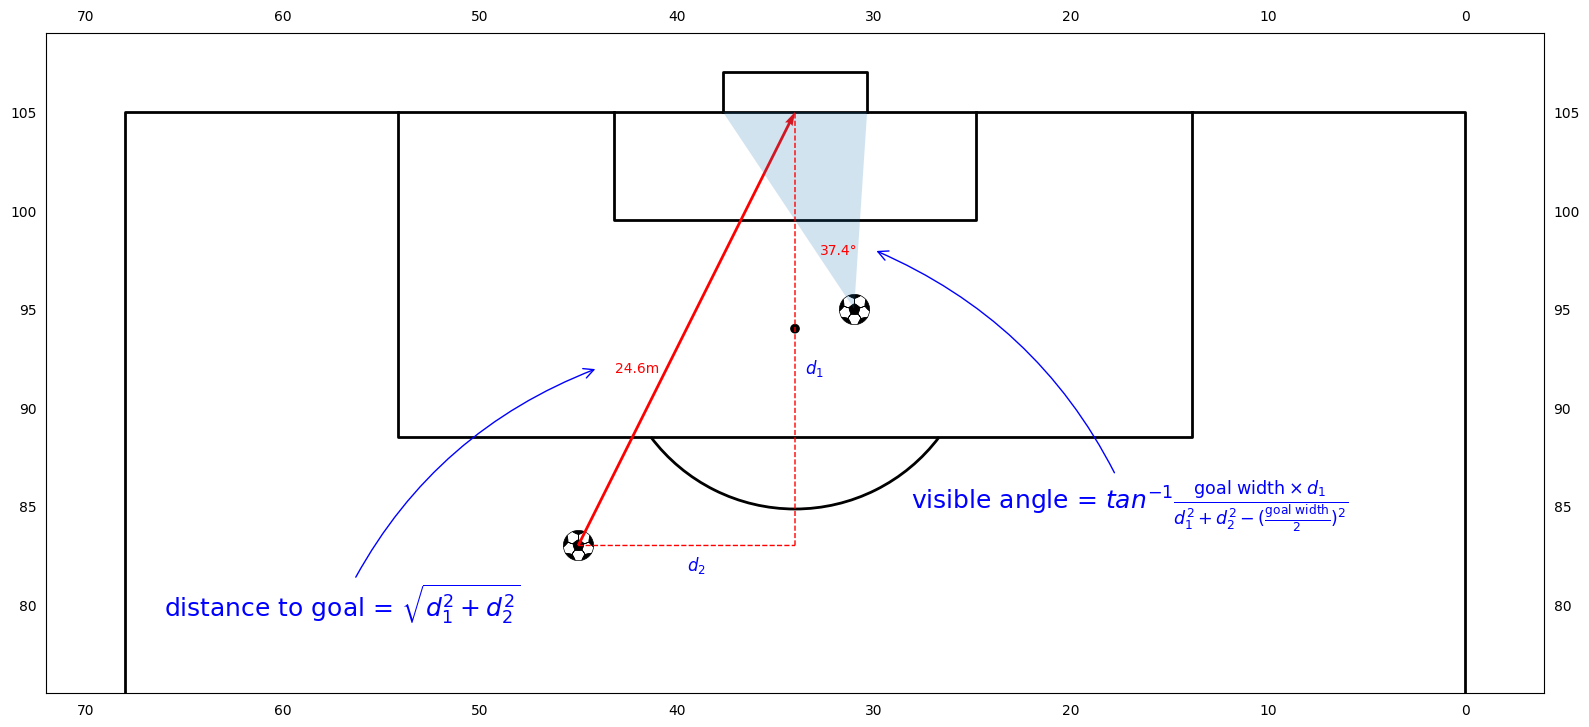

In [32]:
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch

x1, y1 = (83, 45)
x2, y2 = (95,31)

pitch = VerticalPitch(line_color='black', half=True, pad_bottom = -23, label=True, axis=True, goal_type='box', pitch_type='uefa')
fig, ax = pitch.draw(figsize=(16, 9))

mid_goal_y = dim.center_width

pitch.scatter([x1, x2], [y1, y2], ax=ax, marker='football')

pitch.arrows(xstart=x1, ystart=y1, xend=dim.right, yend=mid_goal_y, ax=ax, color='red', width=2, linestyle='--')
pitch.lines(xstart=[x1,x1], ystart=[y1,mid_goal_y], xend=[x1, dim.right], yend=[mid_goal_y, mid_goal_y], ax=ax, color='red', lw=1, ls='--')

pitch.goal_angle(x2, y2, alpha=0.2, ax=ax)

distance_annotation = r'distance to goal = $\sqrt{d_1^2 + d_2^2}$'
distance_arrow = dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", lw=1, color='blue')
pitch.annotate(distance_annotation, xy=(92, 44), xytext=(80, 57),
               arrowprops=distance_arrow, ax=ax, color='blue', fontsize=18, ha='center', va='center')
distance = round(calculate_distance(x1, y1),1)
pitch.annotate(f'{distance}m',(92, 42), ax=ax, fontsize=10, color='red', ha='center', va='center')
pitch.annotate(r'$d_1$',(92, 33), ax=ax, fontsize=12, color='blue', ha='center', va='center')
pitch.annotate(r'$d_2$',(82, 39), ax=ax, fontsize=12, color='blue', ha='center', va='center')

angle_annotation = r'visible angle = $tan^{-1}\frac{\text{goal width} \times d_1}{d_1^2 + d_2^2 - (\frac{\text{goal width}}{2})^2}$'
angle_arrow = dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", lw=1, color='blue')
pitch.annotate(angle_annotation, xy=(98, 30), xytext=(85, 17),
               arrowprops=angle_arrow, ax=ax, color='blue', fontsize=18, ha='center', va='center')
angle_deg = round(calculate_visible(x2, y2),1)
pitch.annotate(f'{angle_deg}°',(98, 31.8), ax=ax, fontsize=10, color='red', ha='center', va='center')

plt.show()

In [33]:
# calculate visible angle and distance
ws_shot['visible_angle'] = ws_shot.apply(lambda x: calculate_visible(x['x'], x['y']), axis=1)
ws_shot['distance'] = ws_shot.apply(lambda x: calculate_distance(x['x'], x['y']), axis=1)

### Final dataset

In [34]:
ws_shot = ws_shot[['x', 'y', 'shot_type', 'body_part', 'is_strong_foot', 'visible_angle', 'distance', 'outcome']]
ws_shot.head()

,x,y,shot_type,body_part,is_strong_foot,visible_angle,distance,outcome
0,92.40,27.88,open_play,Left Foot,False,26.770923,14.007655,1
1,89.25,35.36,open_play,Right Foot,False,25.986925,15.808608,0
2,100.80,35.36,open_play,Head/Other,False,78.788301,4.414703,1
3,85.05,22.44,open_play,Right Foot,True,15.737204,23.057235,0
4,78.75,20.40,open_play,Left Foot,False,12.585866,29.563872,0


In [35]:
ws_shot.info()
ws_shot.to_csv('../Data/ws_shot.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               43040 non-null  float64
 1   y               43040 non-null  float64
 2   shot_type       43040 non-null  object 
 3   body_part       43040 non-null  object 
 4   is_strong_foot  43040 non-null  bool   
 5   visible_angle   43040 non-null  float64
 6   distance        43040 non-null  float64
 7   outcome         43040 non-null  int64  
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 2.3+ MB


## Shots and Goals comparison

Number of shots: 43040
Number of goals: 4790
Conversion rate: 11.13%


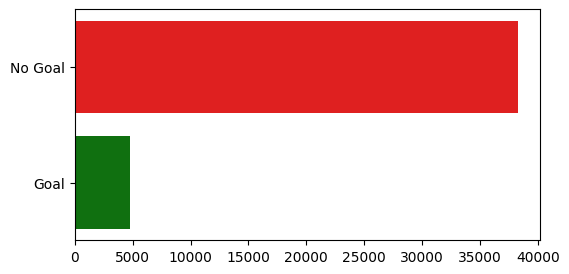

In [36]:
import seaborn as sns

print(f'Number of shots: {ws_shot.shape[0]}')
print(f'Number of goals: {ws_shot[ws_shot["outcome"] == 1].shape[0]}')
print(f'Conversion rate: {round(ws_shot[ws_shot["outcome"] == 1].shape[0] / ws_shot.shape[0] * 100, 2)}%')


outcome = ws_shot['outcome'].apply(lambda x: 'Goal' if x == 1 else 'No Goal').value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(6, 3))

sns.barplot(y=outcome.index, x=outcome.values, ax=ax, hue=outcome.index, palette=['r', 'g'])
ax.set_ylabel('')
plt.show()

Number of shots with strong foot: 7784
Number of goals with strong foot: 880
Conversion rate with strong foot: 11.31%


Number of shots with weak foot/other: 35256
Number of goals with weak foot/other: 3910
Conversion rate with weak foot/other: 11.09%


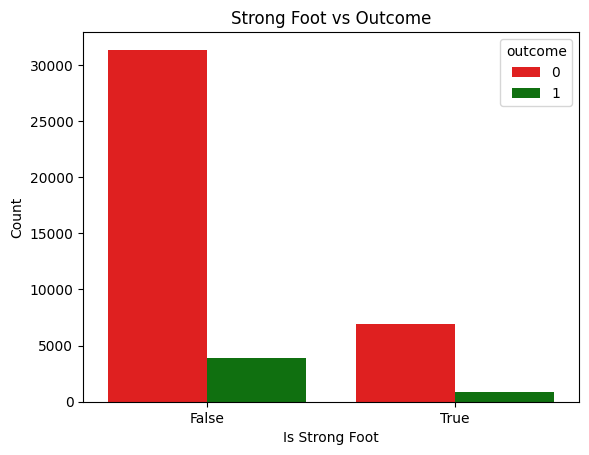

In [37]:
import seaborn as sns

import matplotlib.pyplot as plt

print(f'Number of shots with strong foot: {ws_shot[ws_shot["is_strong_foot"] == True].shape[0]}')
print(f'Number of goals with strong foot: {ws_shot[(ws_shot["is_strong_foot"] == True) & (ws_shot["outcome"] == 1)].shape[0]}')
print(f'Conversion rate with strong foot: {round(ws_shot[(ws_shot["is_strong_foot"] == True) & (ws_shot["outcome"] == 1)].shape[0] / ws_shot[ws_shot["is_strong_foot"] == True].shape[0] * 100, 2)}%')
print('\n')
print(f'Number of shots with weak foot/other: {ws_shot[ws_shot["is_strong_foot"] == False].shape[0]}')
print(f'Number of goals with weak foot/other: {ws_shot[(ws_shot["is_strong_foot"] == False) & (ws_shot["outcome"] == 1)].shape[0]}')
print(f'Conversion rate with weak foot/other: {round(ws_shot[(ws_shot["is_strong_foot"] == False) & (ws_shot["outcome"] == 1)].shape[0] / ws_shot[ws_shot["is_strong_foot"] == False].shape[0] * 100, 2)}%')


sns.countplot(data=ws_shot, x='is_strong_foot', hue='outcome', palette=['r', 'g'])

plt.xlabel('Is Strong Foot')
plt.ylabel('Count')
plt.title('Strong Foot vs Outcome')
plt.show()

Number of open play shots: 40461
Number of open play goals: 4271
Conversion rate of open play shots: 10.56%


Number of free kick shots: 2038
Number of free kick goals: 126
Conversion rate of free kick shots: 6.18%


Number of penalty shots: 541
Number of penalty goals: 393
Conversion rate of penalty shots: 72.64%


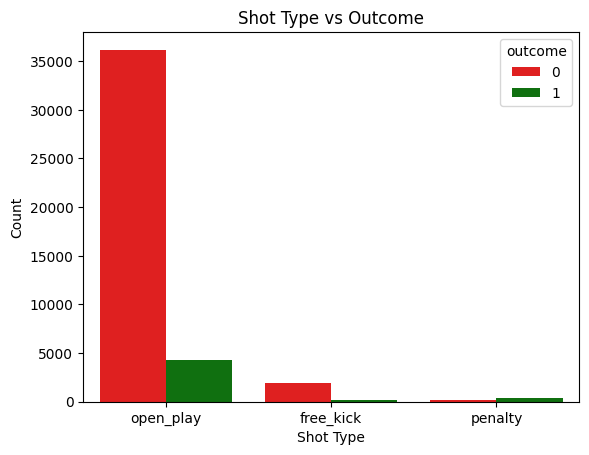

In [38]:
import seaborn as sns

import matplotlib.pyplot as plt

print(f'Number of open play shots: {ws_shot[ws_shot["shot_type"] == 'open_play'].shape[0]}')
print(f'Number of open play goals: {ws_shot[(ws_shot["shot_type"] == 'open_play') & (ws_shot["outcome"] == 1)].shape[0]}')
print(f'Conversion rate of open play shots: {round(ws_shot[(ws_shot["shot_type"] == 'open_play') & (ws_shot["outcome"] == 1)].shape[0] / ws_shot[ws_shot["shot_type"] == 'open_play'].shape[0] * 100, 2)}%')
print('\n')
print(f'Number of free kick shots: {ws_shot[ws_shot["shot_type"] == 'free_kick'].shape[0]}')
print(f'Number of free kick goals: {ws_shot[(ws_shot["shot_type"] == 'free_kick') & (ws_shot["outcome"] == 1)].shape[0]}')
print(f'Conversion rate of free kick shots: {round(ws_shot[(ws_shot["shot_type"] == 'free_kick') & (ws_shot["outcome"] == 1)].shape[0] / ws_shot[ws_shot["shot_type"] == 'free_kick'].shape[0] * 100, 2)}%')
print('\n')
print(f'Number of penalty shots: {ws_shot[ws_shot["shot_type"] == 'penalty'].shape[0]}')
print(f'Number of penalty goals: {ws_shot[(ws_shot["shot_type"] == 'penalty') & (ws_shot["outcome"] == 1)].shape[0]}')
print(f'Conversion rate of penalty shots: {round(ws_shot[(ws_shot["shot_type"] == 'penalty') & (ws_shot["outcome"] == 1)].shape[0] / ws_shot[ws_shot["shot_type"] == 'penalty'].shape[0] * 100, 2)}%')

sns.countplot(data=ws_shot, x='shot_type', hue='outcome', palette=['r', 'g'])

plt.xlabel('Shot Type')
plt.ylabel('Count')
plt.title('Shot Type vs Outcome')
plt.show()

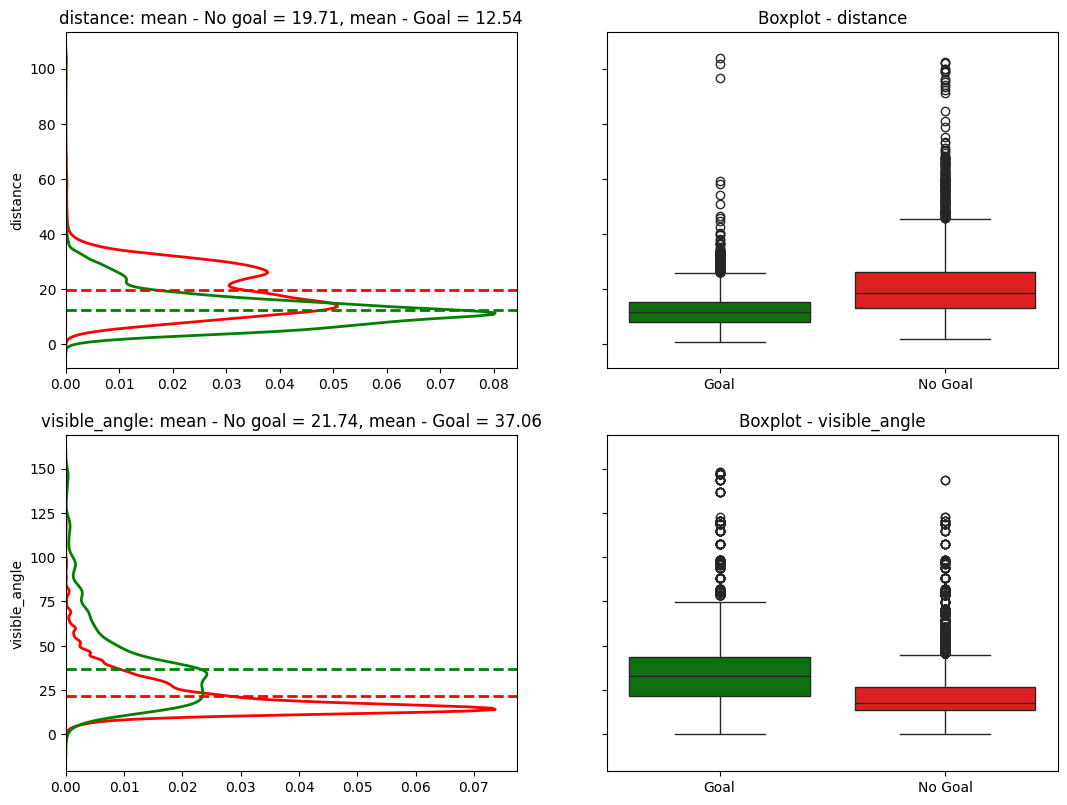

In [39]:
import seaborn as sns

ws_shot['outcome_label'] = ws_shot['outcome'].map({0: 'No Goal', 1: 'Goal'})

cols = ['distance', 'visible_angle']
fig, ax = plt.subplots(nrows=2, ncols=2, sharey='row')

for idx, col in enumerate(cols):
    ax1 = ax[idx][0]
    sns.kdeplot(ws_shot[col][ws_shot['outcome']==0], color='r', ax=ax1, lw=2, label='No Goal', vertical=True)
    sns.kdeplot(ws_shot[col][ws_shot['outcome']==1], color='g', ax=ax1, lw=2, label='Goal', vertical=True)
    # sns.histplot(data=ws_shot , y = col, color='g', ax=ax1, lw=2, hue='outcome_label', palette=['g', 'r'])
    no_goal_mean = ws_shot[col][ws_shot['outcome']==0].mean()
    goal_mean = ws_shot[col][ws_shot['outcome']==1].mean()
    ax1.axhline(no_goal_mean, color='r', linestyle='--', lw=2)
    ax1.axhline(goal_mean, color='g', linestyle='--', lw=2)
    # ax1.legend(loc='upper right')
    ax1.set_title(f'{col}: mean - No goal = {no_goal_mean:.2f}, mean - Goal = {goal_mean:.2f}')
    ax1.set_xlabel('')
    
    ax2 = ax[idx][1]
    sns.boxplot(data=ws_shot, x='outcome_label' , y=col, hue='outcome_label', palette=['g', 'r'], ax=ax2)
    ax2.set_xlabel('')
    ax2.set_title(f'Boxplot - {col}')

fig.set_figheight(fig.get_figheight()*2)
fig.set_figwidth(fig.get_figwidth()*2)
plt.show()

# Expected Goals Model

This is our regression model for Expected Goals

## Split data

In [40]:
ws_shot

,x,y,shot_type,body_part,is_strong_foot,visible_angle,distance,outcome,outcome_label
0,92.40,27.88,open_play,Left Foot,False,26.770923,14.007655,1,Goal
1,89.25,35.36,open_play,Right Foot,False,25.986925,15.808608,0,No Goal
2,100.80,35.36,open_play,Head/Other,False,78.788301,4.414703,1,Goal
3,85.05,22.44,open_play,Right Foot,True,15.737204,23.057235,0,No Goal
4,78.75,20.40,open_play,Left Foot,False,12.585866,29.563872,0,No Goal
...,...,...,...,...,...,...,...,...,...
43035,94.50,21.76,open_play,Left Foot,False,17.306400,16.126612,0,No Goal
43036,96.60,17.00,open_play,Right Foot,False,10.072200,18.962067,1,Goal
43037,96.60,56.44,free_kick,Right Foot,False,6.258016,23.960668,0,No Goal
43038,86.10,20.40,open_play,Left Foot,False,14.662142,23.284544,0,No Goal


In [41]:
from sklearn.model_selection import train_test_split


X = ws_shot.drop(columns=['outcome', 'outcome_label'])
y = ws_shot['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=100)


In [42]:
print('Train data:')
print(f'- Number of shots: {len(y_train)}')
print(f'- Number of goals: {y_train.sum()}')
print(f'- Goal ratio: {y_train.mean()* 100:.2f}%')
print('\n')
print('Test data:')
print(f'- Number of shots: {len(y_test)}')
print(f'- Number of goals: {y_test.sum()}')
print(f'- Goal ratio: {y_test.mean()* 100:.2f}%')

Train data:
- Number of shots: 30127
- Number of goals: 3353
- Goal ratio: 11.13%


Test data:
- Number of shots: 12913
- Number of goals: 1437
- Goal ratio: 11.13%


## Pipeline & Hyperparameter Tunning

In [43]:
# %pip install imblearn

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder(sparse=False, drop='first')

pre_processing = ColumnTransformer([('one_hot', encoder, ['shot_type', 'body_part'])], remainder='passthrough')


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

scaler = StandardScaler()

def lr_model(scoring='neg_brier_score', smote=False, cv=5):
    param_grid = {
        'clf__C': np.logspace(-5,5,100),
    }
    model = LogisticRegression(max_iter=100000)
    
    if smote:
        pipeline = ImbPipeline(
            [
                ('pre_processing', pre_processing),
                ('scaler', scaler),
                ('smote', SMOTE()),
                ('clf', model)
            ]
        )
    else:
        pipeline = Pipeline(
            [
                ('pre_processing', pre_processing),
                ('scaler', scaler),
                ('clf', model)
            ]
        )
    
    return GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring=scoring, cv=cv)


## Experiments & Evaluation

#### 1. Without resapmling data

##### a) Train & test model

In [46]:
xg_model_1 = lr_model()
xg_model_1.fit(X_train, y_train)

print(f'Best parameters: {xg_model_1.best_params_}')
print(f'Best score: {xg_model_1.best_score_}')

/opt/homebrew/Caskroom/miniforge/base/envs/sussex_data_science/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/sussex_data_science/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/sussex_data_science/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/b

Best parameters: {'clf__C': 100000.0}
Best score: -0.08240298770638091


In [47]:
y1_pred = xg_model_1.predict(X_test)

y1_pred_proba = xg_model_1.predict_proba(X_test)[:,1]

##### b) Model's scores

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y1_pred, target_names=['no goal', 'goal']))

              precision    recall  f1-score   support

     no goal       0.91      0.99      0.95     11476
        goal       0.70      0.19      0.30      1437

    accuracy                           0.90     12913
   macro avg       0.80      0.59      0.62     12913
weighted avg       0.88      0.90      0.87     12913



In [49]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss

accuracy = accuracy_score(y_test, y1_pred)
precision = precision_score(y_test, y1_pred, average='weighted')
recall = recall_score(y_test, y1_pred, average='weighted')
f1 = f1_score(y_test, y1_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y1_pred_proba, multi_class='ovr')

log_loss_score = log_loss(y_test, y1_pred_proba)
brier_score = brier_score_loss(y_test, y1_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f'Log loss: {log_loss_score}')
print(f'Brier score loss: {brier_score}')

Accuracy: 0.9005653217687601
Precision: 0.8835025007181104
Recall: 0.9005653217687601
F1 Score: 0.8742019357959566
ROC AUC Score: 0.7905194659975991
Log loss: 0.28518823429397844
Brier score loss: 0.08122091225848993


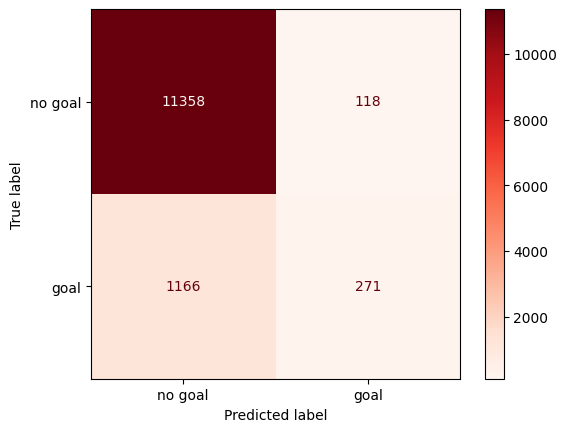

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y1_pred, display_labels=['no goal', 'goal'], cmap='Reds')
plt.show()

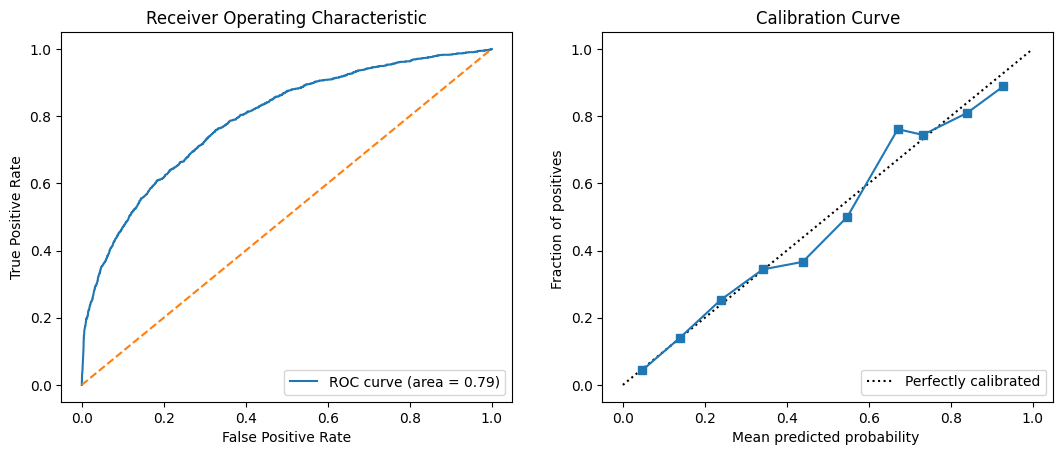

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.calibration import calibration_curve, CalibrationDisplay


fig, ax = plt.subplots(ncols=2)

y1_pred_proba = xg_model_1.predict_proba(X_test)[:,1]

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y1_pred_proba)
roc_auc = roc_auc_score(y_test, y1_pred_proba)
ax[0].plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Receiver Operating Characteristic')
ax[0].legend(loc="lower right")

# plot calibration curve
prob_true, prob_pred = calibration_curve(y_test, y1_pred_proba, n_bins=10)
disp = CalibrationDisplay(prob_true, prob_pred, y1_pred_proba)
disp.plot(ax=ax[1])
ax[1].set_title('Calibration Curve')


fig.set_figwidth(fig.get_figwidth()*2)
plt.show()

##### c) Calibrate model

In [52]:
from sklearn.calibration import CalibratedClassifierCV

xg_model_1_calibrated = CalibratedClassifierCV(xg_model_1, method='isotonic', cv=5, n_jobs=-1)
xg_model_1_calibrated.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/sussex_data_science/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/sussex_data_science/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/sussex_data_science/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/b

CalibratedClassifierCV(cv=5,
                       estimator=GridSearchCV(cv=5,
                                              estimator=Pipeline(steps=[('pre_processing',
                                                                         ColumnTransformer(remainder='passthrough',
                                                                                           transformers=[('one_hot',
                                                                                                          OneHotEncoder(drop='first',
                                                                                                                        sparse=False),
                                                                                                          ['shot_type',
                                                                                                           'body_part'])])),
                                                                        ('scaler',
                                                                         StandardScaler()),
                                                                        ('clf',
                                                                         LogisticRegression(max_iter=100000))]),
                                              n_jobs=-1,
                                              param_grid={'clf__C': array([...
       1.20450354e+03, 1.51991108e+03, 1.91791026e+03, 2.42012826e+03,
       3.05385551e+03, 3.85352859e+03, 4.86260158e+03, 6.13590727e+03,
       7.74263683e+03, 9.77009957e+03, 1.23284674e+04, 1.55567614e+04,
       1.96304065e+04, 2.47707636e+04, 3.12571585e+04, 3.94420606e+04,
       4.97702356e+04, 6.28029144e+04, 7.92482898e+04, 1.00000000e+05])},
                                              scoring='neg_brier_score'),
                       method='isotonic', n_jobs=-1)

In [53]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss


y1_pred_calibrated = xg_model_1_calibrated.predict(X_test)
y1_pred_proba_calibrated = xg_model_1_calibrated.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y1_pred_calibrated)
precision = precision_score(y_test, y1_pred_calibrated, average='weighted')
recall = recall_score(y_test, y1_pred_calibrated, average='weighted')
f1 = f1_score(y_test, y1_pred_calibrated, average='weighted')
roc_auc = roc_auc_score(y_test, y1_pred_proba_calibrated, multi_class='ovr')

log_loss_score = log_loss(y_test, y1_pred_proba_calibrated)
brier_score = brier_score_loss(y_test, y1_pred_proba_calibrated)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f'Log loss: {log_loss_score}')
print(f'Brier score loss: {brier_score}')

print('\n')

print(f"Previous Log-loss: {log_loss(y_test, y1_pred_proba)}")
print(f"Calibrated log-loss: {log_loss(y_test, y1_pred_proba_calibrated)}")
print('---')
print(f'Previous Brier score loss: {brier_score_loss(y_test, y1_pred_proba)}')
print(f'Calibrated Brier score loss: {brier_score_loss(y_test, y1_pred_proba_calibrated)}')
print('---')
print(f'Previous ROC AUC: {roc_auc_score(y_test, y1_pred_proba)}')
print(f'Calibrated ROC AUC: {roc_auc_score(y_test, y1_pred_proba_calibrated)}')

Accuracy: 0.9007202044451328
Precision: 0.8839744013392862
Recall: 0.9007202044451328
F1 Score: 0.8742342682475941
ROC AUC Score: 0.7905189202457678
Log loss: 0.28465115891362297
Brier score loss: 0.08128825912616149


Previous Log-loss: 0.28518823429397844
Calibrated log-loss: 0.28465115891362297
---
Previous Brier score loss: 0.08122091225848993
Calibrated Brier score loss: 0.08128825912616149
---
Previous ROC AUC: 0.7905194659975991
Calibrated ROC AUC: 0.7905189202457678


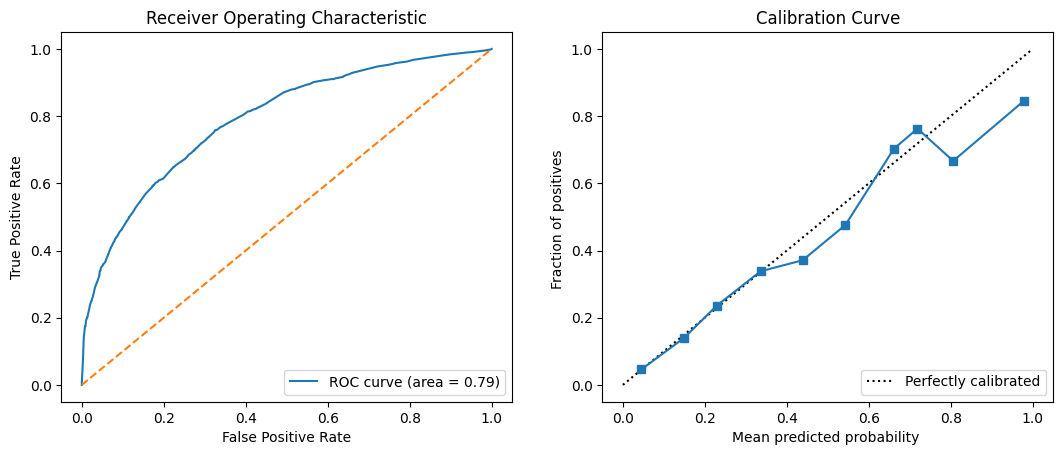

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.calibration import calibration_curve, CalibrationDisplay


fig, ax = plt.subplots(ncols=2)

y1_pred_proba_calibrated = xg_model_1_calibrated.predict_proba(X_test)[:,1]

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y1_pred_proba_calibrated)
roc_auc = roc_auc_score(y_test, y1_pred_proba_calibrated)
ax[0].plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Receiver Operating Characteristic')
ax[0].legend(loc="lower right")

# plot calibration curve
prob_true, prob_pred = calibration_curve(y_test, y1_pred_proba_calibrated, n_bins=10)
disp = CalibrationDisplay(prob_true, prob_pred, y1_pred_proba_calibrated)
disp.plot(ax=ax[1])
ax[1].set_title('Calibration Curve')


fig.set_figwidth(fig.get_figwidth()*2)
plt.show()

In [55]:
from sklearn.metrics import classification_report

y1_pred_calibrated = xg_model_1_calibrated.predict(X_test)

print(classification_report(y_test, y1_pred_calibrated, target_names=['no goal', 'goal']))

              precision    recall  f1-score   support

     no goal       0.91      0.99      0.95     11476
        goal       0.70      0.19      0.30      1437

    accuracy                           0.90     12913
   macro avg       0.80      0.59      0.62     12913
weighted avg       0.88      0.90      0.87     12913



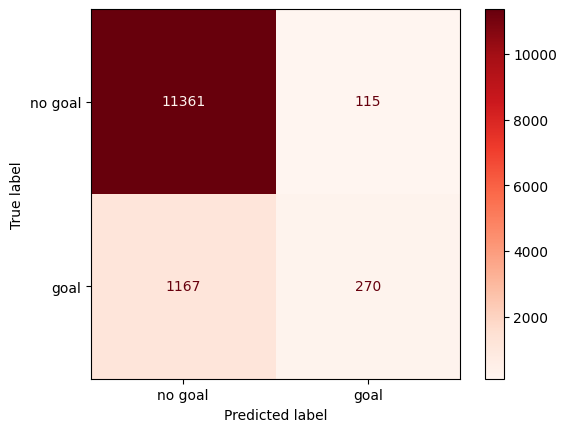

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y1_pred_calibrated, display_labels=['no goal', 'goal'], cmap='Reds')
plt.show()

#### 2. Oversampling data with SMOTE

##### a) Train & test model

In [57]:
xg_model_2 = lr_model(smote=True)
xg_model_2.fit(X_train, y_train)

print(f'Best parameters: {xg_model_2.best_params_}')
print(f'Best score: {xg_model_2.best_score_}')

/opt/homebrew/Caskroom/miniforge/base/envs/sussex_data_science/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/sussex_data_science/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/sussex_data_science/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/b

Best parameters: {'clf__C': 0.005336699231206307}
Best score: -0.180297193954503


In [58]:
y2_pred = xg_model_2.predict(X_test)

y2_pred_proba = xg_model_2.predict_proba(X_test)[:,1]

##### b) Model's scores

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y2_pred, target_names=['no goal', 'goal']))

              precision    recall  f1-score   support

     no goal       0.95      0.74      0.83     11476
        goal       0.25      0.68      0.37      1437

    accuracy                           0.74     12913
   macro avg       0.60      0.71      0.60     12913
weighted avg       0.87      0.74      0.78     12913



In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss

accuracy = accuracy_score(y_test, y2_pred)
precision = precision_score(y_test, y2_pred, average='weighted')
recall = recall_score(y_test, y2_pred, average='weighted')
f1 = f1_score(y_test, y2_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y2_pred_proba, multi_class='ovr')

log_loss_score = log_loss(y_test, y2_pred_proba)
brier_score = brier_score_loss(y_test, y2_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f'Log loss: {log_loss_score}')
print(f'Brier score loss: {brier_score}')

Accuracy: 0.7359250367846356
Precision: 0.8713211701347268
Recall: 0.7359250367846356
F1 Score: 0.7811975232100755
ROC AUC Score: 0.7903017110168861
Log loss: 0.5485406424802565
Brier score loss: 0.18178766906569732


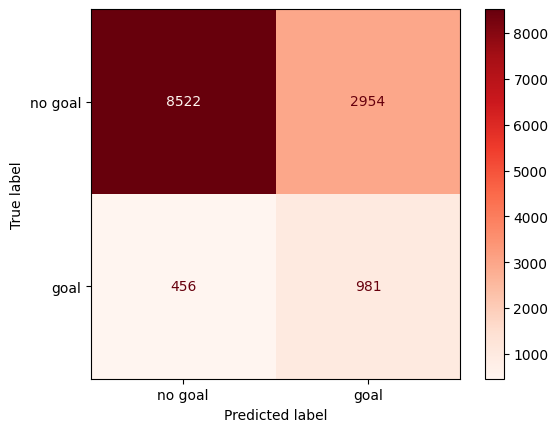

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y2_pred, display_labels=['no goal', 'goal'], cmap='Reds')
plt.show()

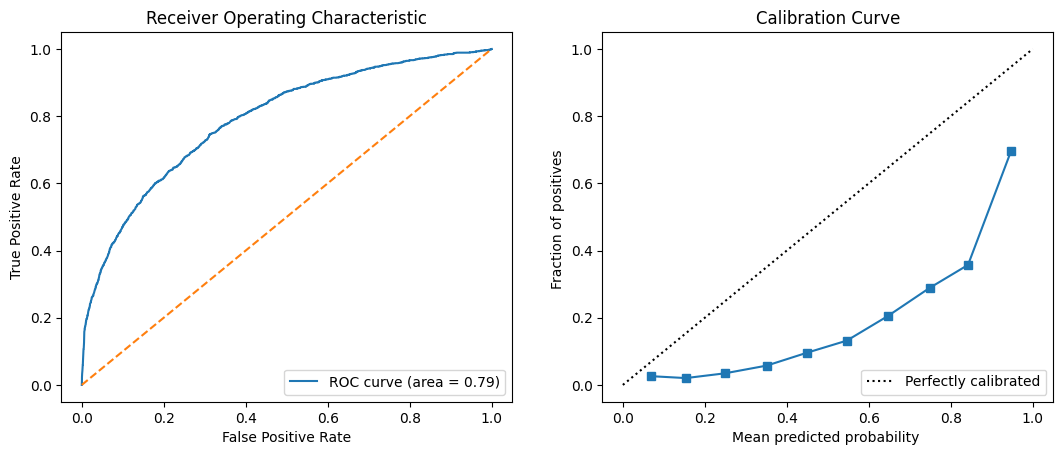

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.calibration import calibration_curve, CalibrationDisplay


fig, ax = plt.subplots(ncols=2)

y2_pred_proba = xg_model_2.predict_proba(X_test)[:,1]

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y2_pred_proba)
roc_auc = roc_auc_score(y_test, y2_pred_proba)
ax[0].plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Receiver Operating Characteristic')
ax[0].legend(loc="lower right")

# plot calibration curve
prob_true, prob_pred = calibration_curve(y_test, y2_pred_proba, n_bins=10)
disp = CalibrationDisplay(prob_true, prob_pred, y2_pred_proba)
disp.plot(ax=ax[1])
ax[1].set_title('Calibration Curve')


fig.set_figwidth(fig.get_figwidth()*2)
plt.show()

##### c) Calibrate model

In [63]:
from sklearn.calibration import CalibratedClassifierCV

xg_model_2_calibrated = CalibratedClassifierCV(xg_model_2, method='isotonic', cv=5, n_jobs=-1)
xg_model_2_calibrated.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/sussex_data_science/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/sussex_data_science/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/sussex_data_science/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/b

CalibratedClassifierCV(cv=5,
                       estimator=GridSearchCV(cv=5,
                                              estimator=Pipeline(steps=[('pre_processing',
                                                                         ColumnTransformer(remainder='passthrough',
                                                                                           transformers=[('one_hot',
                                                                                                          OneHotEncoder(drop='first',
                                                                                                                        sparse=False),
                                                                                                          ['shot_type',
                                                                                                           'body_part'])])),
                                                                        ('scaler',
                                                                         StandardScaler()),
                                                                        ('smote',
                                                                         SMOTE()),
                                                                        ('clf',
                                                                         LogisticRegression(max_iter=100000))]),
                                              n_jobs=-1,
                                              param_grid...
       1.20450354e+03, 1.51991108e+03, 1.91791026e+03, 2.42012826e+03,
       3.05385551e+03, 3.85352859e+03, 4.86260158e+03, 6.13590727e+03,
       7.74263683e+03, 9.77009957e+03, 1.23284674e+04, 1.55567614e+04,
       1.96304065e+04, 2.47707636e+04, 3.12571585e+04, 3.94420606e+04,
       4.97702356e+04, 6.28029144e+04, 7.92482898e+04, 1.00000000e+05])},
                                              scoring='neg_brier_score'),
                       method='isotonic', n_jobs=-1)

In [64]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss


y2_pred_calibrated = xg_model_1_calibrated.predict(X_test)
y2_pred_proba_calibrated = xg_model_1_calibrated.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y2_pred_calibrated)
precision = precision_score(y_test, y2_pred_calibrated, average='weighted')
recall = recall_score(y_test, y2_pred_calibrated, average='weighted')
f1 = f1_score(y_test, y2_pred_calibrated, average='weighted')
roc_auc = roc_auc_score(y_test, y2_pred_proba_calibrated, multi_class='ovr')

log_loss_score = log_loss(y_test, y2_pred_proba_calibrated)
brier_score = brier_score_loss(y_test, y2_pred_proba_calibrated)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f'Log loss: {log_loss_score}')
print(f'Brier score loss: {brier_score}')

print('\n')

print(f"Previous Log-loss: {log_loss(y_test, y2_pred_proba)}")
print(f"Calibrated log-loss: {log_loss(y_test, y2_pred_proba_calibrated)}")
print('---')
print(f'Previous Brier score loss: {brier_score_loss(y_test, y2_pred_proba)}')
print(f'Calibrated Brier score loss: {brier_score_loss(y_test, y2_pred_proba_calibrated)}')
print('---')
print(f'Previous ROC AUC: {roc_auc_score(y_test, y2_pred_proba)}')
print(f'Calibrated ROC AUC: {roc_auc_score(y_test, y2_pred_proba_calibrated)}')

Accuracy: 0.9007202044451328
Precision: 0.8839744013392862
Recall: 0.9007202044451328
F1 Score: 0.8742342682475941
ROC AUC Score: 0.7905189202457678
Log loss: 0.28465115891362297
Brier score loss: 0.08128825912616149


Previous Log-loss: 0.5485406424802565
Calibrated log-loss: 0.28465115891362297
---
Previous Brier score loss: 0.18178766906569732
Calibrated Brier score loss: 0.08128825912616149
---
Previous ROC AUC: 0.7903017110168861
Calibrated ROC AUC: 0.7905189202457678


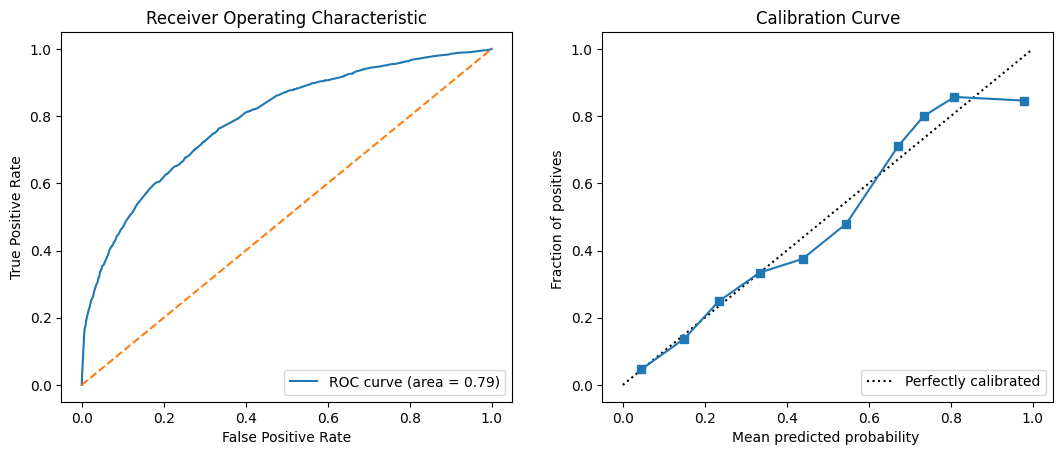

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.calibration import calibration_curve, CalibrationDisplay


fig, ax = plt.subplots(ncols=2)

y2_pred_proba_calibrated = xg_model_2_calibrated.predict_proba(X_test)[:,1]

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y2_pred_proba_calibrated)
roc_auc = roc_auc_score(y_test, y2_pred_proba_calibrated)
ax[0].plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Receiver Operating Characteristic')
ax[0].legend(loc="lower right")

# plot calibration curve
prob_true, prob_pred = calibration_curve(y_test, y2_pred_proba_calibrated, n_bins=10)
disp = CalibrationDisplay(prob_true, prob_pred, y2_pred_proba_calibrated)
disp.plot(ax=ax[1])
ax[1].set_title('Calibration Curve')


fig.set_figwidth(fig.get_figwidth()*2)
plt.show()

In [66]:
from sklearn.metrics import classification_report

y2_pred_calibrated = xg_model_2_calibrated.predict(X_test)
print(classification_report(y_test, y2_pred_calibrated, target_names=['no goal', 'goal']))

              precision    recall  f1-score   support

     no goal       0.91      0.99      0.95     11476
        goal       0.70      0.19      0.30      1437

    accuracy                           0.90     12913
   macro avg       0.80      0.59      0.62     12913
weighted avg       0.88      0.90      0.87     12913



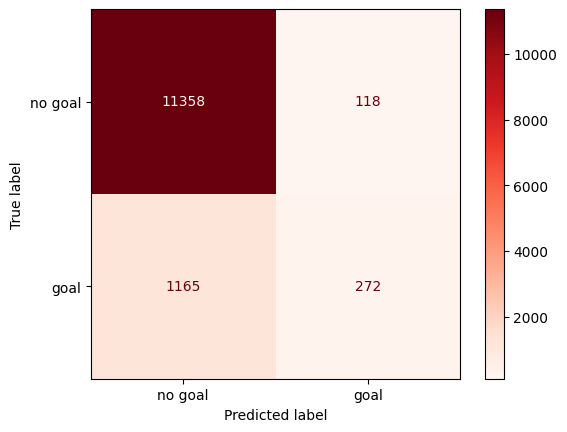

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y2_pred_calibrated, display_labels=['no goal', 'goal'], cmap='Reds')
plt.show()

#### 3. Plot predicted xG values

In [68]:
plot_data = ws_shot.copy()

X = plot_data[['x', 'y', 'shot_type', 'body_part', 'is_strong_foot', 'visible_angle', 'distance', 'outcome']]

plot_data['xG'] = xg_model_1_calibrated.predict_proba(X)[:, 1]
plot_data

,x,y,shot_type,body_part,is_strong_foot,visible_angle,distance,outcome,outcome_label,xG
0,92.40,27.88,open_play,Left Foot,False,26.770923,14.007655,1,Goal,0.168016
1,89.25,35.36,open_play,Right Foot,False,25.986925,15.808608,0,No Goal,0.143211
2,100.80,35.36,open_play,Head/Other,False,78.788301,4.414703,1,Goal,0.417299
3,85.05,22.44,open_play,Right Foot,True,15.737204,23.057235,0,No Goal,0.034395
4,78.75,20.40,open_play,Left Foot,False,12.585866,29.563872,0,No Goal,0.019698
...,...,...,...,...,...,...,...,...,...,...
43035,94.50,21.76,open_play,Left Foot,False,17.306400,16.126612,0,No Goal,0.084666
43036,96.60,17.00,open_play,Right Foot,False,10.072200,18.962067,1,Goal,0.045919
43037,96.60,56.44,free_kick,Right Foot,False,6.258016,23.960668,0,No Goal,0.054787
43038,86.10,20.40,open_play,Left Foot,False,14.662142,23.284544,0,No Goal,0.034395


In [69]:
plot_data['xG'].describe()

count    43040.000000
mean         0.111522
std          0.131641
min          0.002024
25%          0.031131
50%          0.069075
75%          0.143211
max          1.000000
Name: xG, dtype: float64

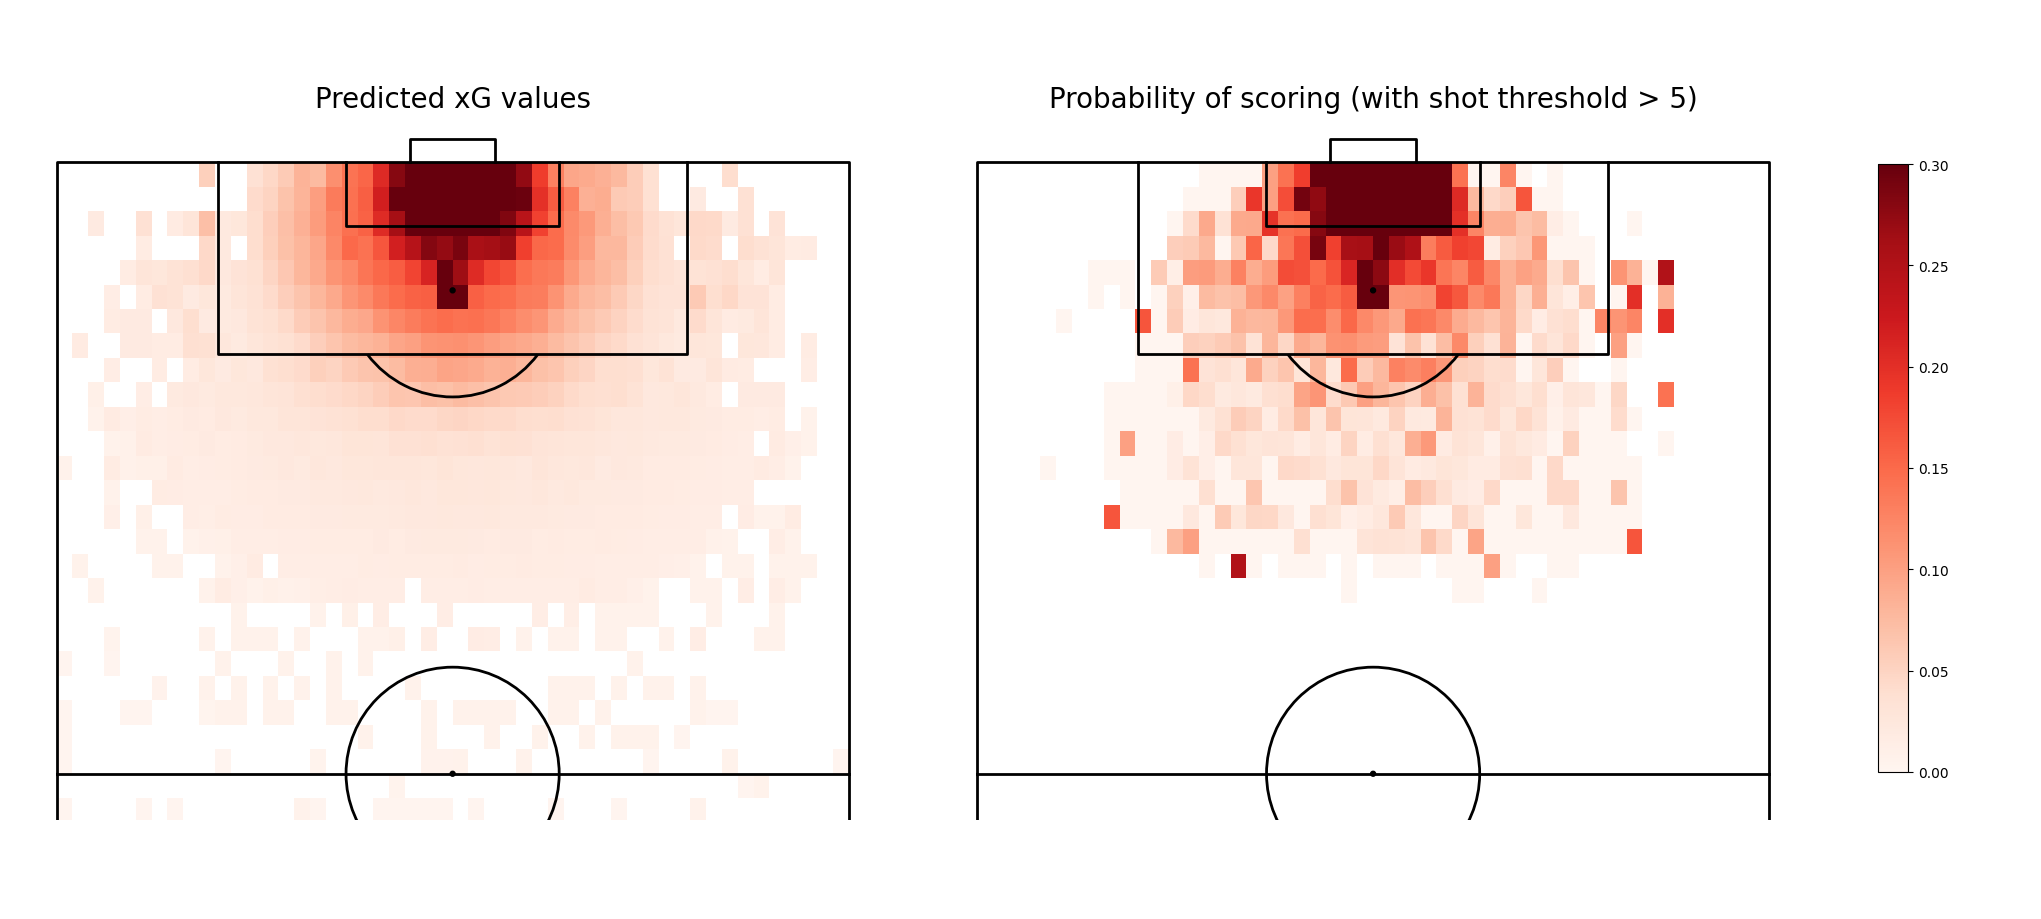

In [78]:
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch

#plot pitch
pitch = VerticalPitch(line_color='black', line_zorder=2, half = True, goal_type='box', pitch_type='uefa')
fig, ax = pitch.grid(nrows=1, ncols=2, grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0,)

shot_threshold = 5

# bin_xG = pitch.bin_statistic(plot_data['x'], plot_data['y'], values=plot_data['xG'], statistic='sum', bins=50)
bin_xG = pitch.bin_statistic(plot_data['x'], plot_data['y'], values=plot_data['xG'], statistic='mean', bins=50)
bin_shots = pitch.bin_statistic(plot_data['x'], plot_data['y'], bins=50)
bin_goals = pitch.bin_statistic(plot_data[plot_data['outcome'] == 1]['x'], plot_data[plot_data['outcome'] == 1]['y'], bins=50)

# bin_xG['statistic'] = np.where(bin_shots['statistic'] >= shot_threshold, bin_xG['statistic'] / bin_shots['statistic'], np.nan)

bin_proba = bin_shots.copy()
bin_proba['statistic'] = bin_goals['statistic'] / bin_shots['statistic']

bin_proba_with_threshold = bin_shots.copy()
proba_with_threshold = np.where(bin_shots['statistic'] >= shot_threshold, bin_goals['statistic'] / bin_shots['statistic'], np.nan)
bin_proba_with_threshold['statistic'] = proba_with_threshold

pcm_xg = pitch.heatmap(bin_xG, ax=ax['pitch'][0], cmap='Reds', edgecolor=None, vmin=0, vmax=0.3)
ax['pitch'][0].set_title('Predicted xG values', fontsize=20, color='black')
pcm_proba_threshold = pitch.heatmap(bin_proba_with_threshold, ax=ax['pitch'][1], cmap='Reds', edgecolor=None, vmin=0, vmax=0.3)
ax['pitch'][1].set_title(f'Probability of scoring (with shot threshold > {shot_threshold})', fontsize=20, color='black')

cbar= fig.colorbar(pcm_proba_threshold, ax=ax['pitch'], orientation='vertical', shrink=0.75, aspect=20, fraction=0.1, pad=0.03)

# fig.suptitle('Heatmap of Predicted xG values and True Probability of Scoring', x=0.5, y=0.98, fontsize=24, color='black')
plt.show()

## Saving model

In [71]:
import pickle

with open('../Models/Expected Model/xG_model.pkl', 'wb') as file:
    pickle.dump(xg_model_1, file)
    
with open('../Models/Expected Model/xG_model_calibrated.pkl', 'wb') as file:
    pickle.dump(xg_model_1_calibrated, file)

# Model Explanation

In [72]:
# %pip install shap

In [73]:
import shap

best_pipeline = xg_model_1.best_estimator_
best_model = best_pipeline.named_steps['clf']


preprocessor = best_pipeline[:-1]
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# get feature names
pre_processing_step = preprocessor.named_steps['pre_processing']
feat_names = [feat.split('__')[1] for feat in pre_processing_step.get_feature_names_out()]
print(feat_names)

explainer = shap.Explainer(best_model, X_train_transformed, feature_names=feat_names)

shap_values = explainer(X_test_transformed)


['shot_type_open_play', 'shot_type_penalty', 'body_part_Left Foot', 'body_part_Right Foot', 'x', 'y', 'is_strong_foot', 'visible_angle', 'distance']


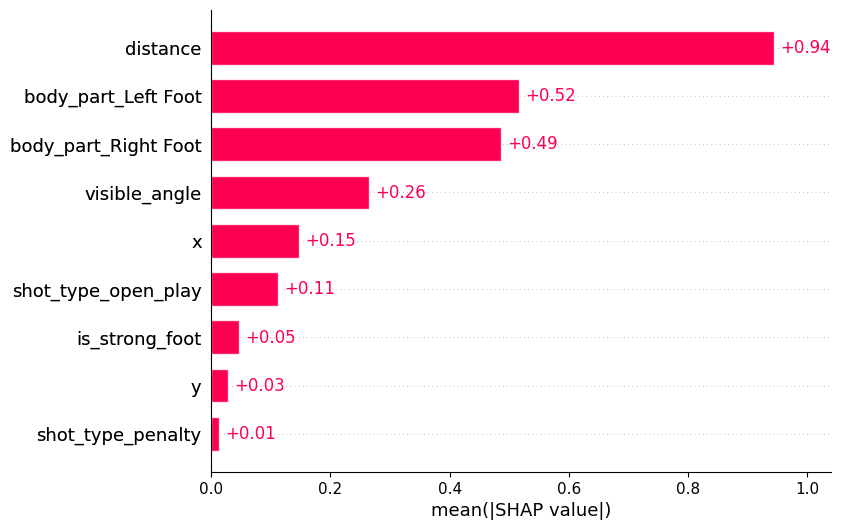

In [74]:
shap.plots.bar(shap_values)

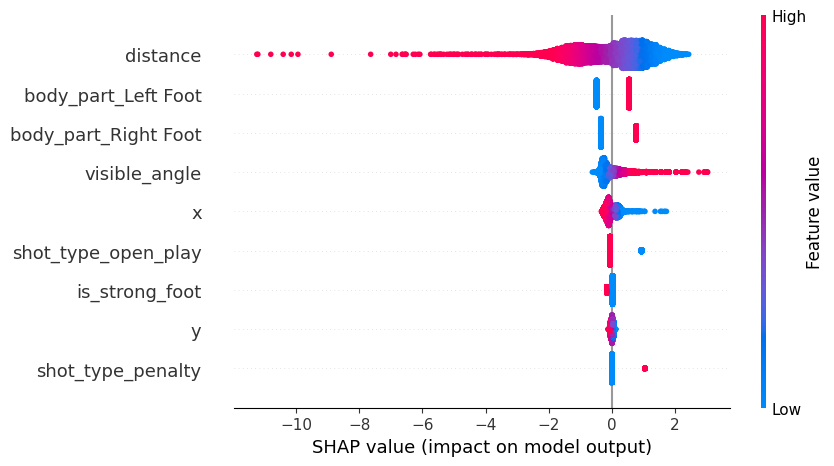

In [75]:
shap.plots.beeswarm(shap_values)